In [22]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
from matplotlib.colors import ListedColormap,LogNorm

In [23]:
font = {'family':'Century','style':'normal','size':20,'weight':'normal'}
matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
np.seterr(divide='ignore', invalid='ignore')
matplotlib.rc('axes',titlesize=20,labelsize=15,linewidth=2)
def nolabely(axis):
    for label in axis.get_yticklabels():
        label.set_visible(False)
def nolabelx(axis):
    for label in axis.get_xticklabels():
        label.set_visible(False)

In [24]:
fact=24*1e-4
first=True
direct='diagram_pmax/pmax0_5/'
elvec_vec=[['branch0','branch1']]
n=0
elvec=elvec_vec[n]
sol={}
for el in elvec:
    first = True
    with open(direct+el+'.cvs', 'r') as f:
        l=csv.reader(f, delimiter=',')
        for row in l:
            if first:
                temp=np.array(row,dtype=float)
                first=False
            else:
                row=np.array(row,dtype=float)
                temp=np.column_stack((temp,row))
    f.close()
    sol[el]=temp[:,::-1]

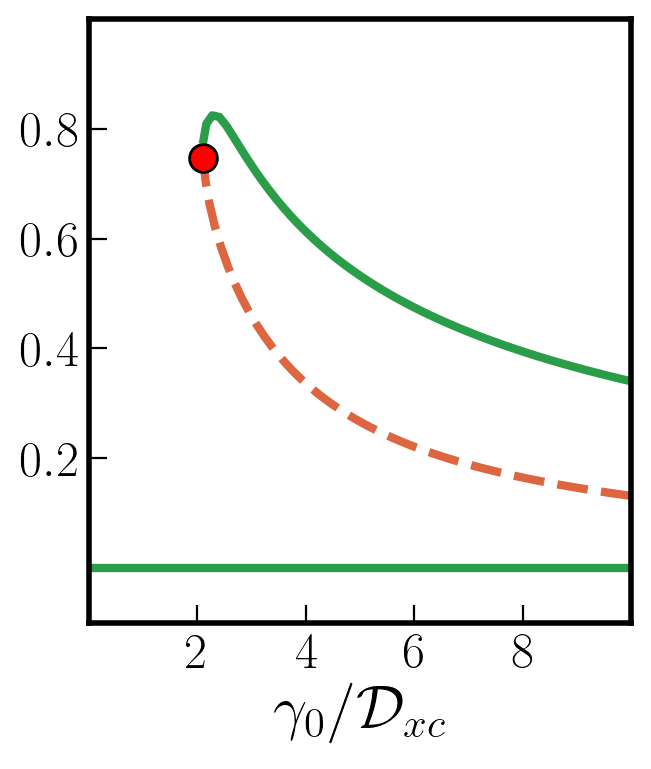

In [34]:
c1=[42/255,157/255,73/255,1]
c2=[221/255,102/255,64/255,1]
c3=[255/255,184/255,0,1]
plt.figure(figsize=(3.5,4),dpi=200)
for el in elvec[::-1]:
    xindstab=np.where(sol[el][-1,:]>0)[0]
    finstab=[xindstab[i]+1 for i in range(len(xindstab)-1) if xindstab[i]+1!=xindstab[i+1]]
    xinduns=np.where(sol[el][-1,:]<1)[0]
    finun=[xinduns[i]+1 for i in range(len(xinduns)-1) if xinduns[i]+1!=xinduns[i+1]]
    indexfinal=np.where(sol[el][1,:]<0)[0]
    if len(finstab)==0:
        plt.plot(sol[el][0,xindstab],sol[el][1,xindstab],lw=3.,color=c1)
        plt.plot(sol[el][0,xinduns],sol[el][1,xinduns],'--',lw=3,color=c2)
    else:
        plt.plot(sol[el][0,:finstab[0]],sol[el][1,:finstab[0]],lw=3.,color=c1)

        plt.plot(sol[el][0,finstab[0]:finun[0]],sol[el][1,finstab[0]:finun[0]],'--',lw=3.,color=c2)
        plt.plot(sol[el][0,finstab[0]],sol[el][1,finstab[0]],'o',color='red',markersize=10,markeredgecolor='k')

        plt.plot(sol[el][0,finun[0]:xindstab[-1]+2],sol[el][1,finun[0]:xindstab[-1]+2],lw=3.,color=c1)
     #   plt.plot(sol[el][0,finun[0]-1],sol[el][1,finun[0]-1],'o',color='red',markersize=10,markeredgecolor='k')

        plt.plot(sol[el][0,xindstab[-1]+1:],sol[el][1,xindstab[-1]+1:],'--',lw=3.,color=c2)
        
meanA=0.5*(sol[el][0,xinduns[-1]]+sol[el][0,xinduns[-1]+1])
plt.plot(meanA,sol[el][1,xinduns[-1]],'o',color='red',markersize=10,markeredgecolor='k')
plt.xlim(0,10)
plt.ylim(-0.1,1)
plt.tick_params(direction='in',size=6.5,labelsize=18)
plt.xticks([2,4,6,8])
plt.yticks([0.2,0.4,0.6,0.8])

plt.xlabel('$\\gamma_0/\\mathcal{D}_{xc}$',rotation=0,size=22)
plt.savefig(direct+'figure.pdf',dpi=200,pad_inches=0.1,bbox_inches='tight')

In [21]:
sol[el]

array([[ 0.        ,  0.08945652,  0.23087788,  0.37229923,  0.51372059,
         0.65514194,  0.7965633 ,  0.93798466,  1.07940601,  1.22082737,
         1.36224873,  1.50367008,  1.64509144,  1.78651279,  1.92793415,
         2.06935551,  2.21077686,  2.35219822,  2.49361958,  2.63504093,
         2.77646229,  2.91788364,  3.059305  ,  3.20072636,  3.34214771,
         3.48356907,  3.62499043,  3.76641178,  3.90783314,  4.04925449,
         4.19067585,  4.33209721,  4.47351856,  4.61493992,  4.75636128,
         4.89778263,  5.03920399,  5.18062534,  5.3220467 ,  5.46346806,
         5.60488941,  5.74631077,  5.88773213,  6.02915348,  6.17057484,
         6.31199619,  6.45341755,  6.59483891,  6.73626026,  6.87768162,
         7.01910298,  7.16052433,  7.30194569,  7.44336704,  7.5847884 ,
         7.72620976,  7.86763111,  8.00905247,  8.15047383,  8.29189518,
         8.43331654,  8.57473789,  8.71615925,  8.85758061,  8.99900196,
         9.14042332,  9.28184468,  9.42326603,  9.5

Bifurcation Diagram for gamma

In [122]:
first=True
direct='solBif/'
elvec=['bifgammaV3']
sol={}
for el in elvec:
    first = True
    with open(direct+el+'.txt', 'r') as f:
        l=csv.reader(f, delimiter=',')
        for row in l:
            if first:
                temp=np.array(row,dtype=float)
                first=False
            else:
                row=np.array(row,dtype=float)
                temp=np.column_stack((temp,row))
    f.close()
    sol[el]=temp

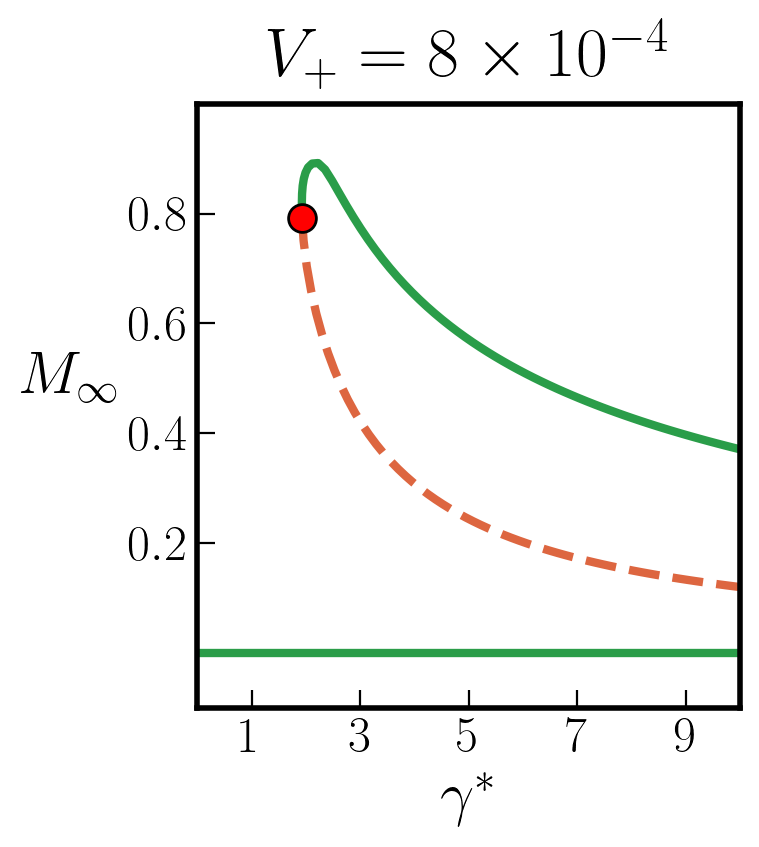

In [124]:
c1=[42/255,157/255,73/255,1]
c2=[221/255,102/255,64/255,1]
c3=[255/255,184/255,0,1]
plt.figure(figsize=(3.5,4),dpi=200)
for el in elvec:
    xindstab=np.where(sol[el][-1,:]>0)[0]
    finstab=[xindstab[i]+1 for i in range(len(xindstab)-1) if xindstab[i]+1!=xindstab[i+1]]
    xinduns=np.where(sol[el][-1,:]<1)[0]
    finun=[xinduns[i]+1 for i in range(len(xinduns)-1) if xinduns[i]+1!=xinduns[i+1]]
    if len(finstab)==0:
        plt.plot(sol[el][0,xindstab],sol[el][1,xindstab],lw=3.,color=c1)
        plt.plot(sol[el][0,xinduns],sol[el][1,xinduns],'--',lw=3,color=c2)
    else:
        plt.plot(sol[el][0,:finstab[0]],sol[el][1,:finstab[0]],lw=3.,color=c1)
        
        if len(finun)>0:
            plt.plot(sol[el][0,finstab[0]:finun[0]],sol[el][1,finstab[0]:finun[0]],'--',lw=3.,color=c2)
            plt.plot(sol[el][0,finstab[0]],sol[el][1,finstab[0]],'o',color='red',markersize=10,markeredgecolor='k')

            plt.plot(sol[el][0,finun[0]:xindstab[-1]+2],sol[el][1,finun[0]:xindstab[-1]+2],lw=3.,color=c1)
            plt.plot(sol[el][0,finun[0]-1],sol[el][1,finun[0]-1],'o',color='red',markersize=10,markeredgecolor='k')
            plt.plot(sol[el][0,xindstab[-1]+1:],sol[el][1,xindstab[-1]+1:],'--',lw=3.,color=c2)

        else:
            plt.plot(sol[el][0,xindstab[0]-1],sol[el][1,xindstab[0]-1],'o',color='red',markersize=10,markeredgecolor='k')

            plt.plot(sol[el][0,xinduns],sol[el][1,xinduns],'--',lw=3.,color=c2)
            plt.plot(sol[el][0,xinduns[-1]+1:],sol[el][1,xinduns[-1]+1:],lw=3.,color=c1)


plt.plot([0,10],[0,0],lw=3.,color=c1)

#plt.plot([0,10],[0,0],'--',lw=3.,color=c2)
#plt.plot(sol[el][0,PA],sol[el][1,PA],'o',color='pink',markersize=10,markeredgecolor='k')
#plt.plot(sol[el][0,PB],sol[el][1,PB],'o',color='pink',markersize=10,markeredgecolor='k')
#plt.plot(sol[el][0,PC],sol[el][1,PC],'o',color='pink',markersize=10,markeredgecolor='k')

#meanA=0.5*(sol[el][0,xinduns[-1]]+sol[el][0,xinduns[-1]+1])
#plt.plot(meanA,sol[el][1,xinduns[-1]],'o',color='red',markersize=10,markeredgecolor='k')
meanA=0.5*(sol[el][0,xinduns[0]-1]+sol[el][0,xinduns[0]])
plt.plot(meanA,sol[el][1,xinduns[0]],'o',color='red',markersize=10,markeredgecolor='k')

plt.xlim(0,10)
plt.ylim(-0.1,1)
plt.tick_params(direction='in',size=6.5,labelsize=18)
plt.xticks([1,3,5,7,9])
plt.yticks([0.2,0.4,0.6,0.8])

plt.ylabel('$M_\infty$',rotation=0,size=22,labelpad=21)
plt.xlabel('$\gamma^*$',rotation=0,size=22)
plt.title('$V_+=8\\times 10^{-4}$',pad=10,size=25)
plt.savefig(direct+'bifdiagV3.pdf',dpi=200,pad_inches=0.1,bbox_inches='tight')

In [72]:
PA=xindstab[np.where(sol[el][0,xindstab]>2.0)[0][0]]
PB=xinduns[np.where(sol[el][0,xinduns]>2.0)[0][-1]]
PC=xindstab[np.where(sol[el][0,xindstab]>4.0)[0][0]]


In [125]:
meanA

1.9268356576309829